In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
mileage = df['Mileage'].values
sell_price = df['Sell Price($)'].values

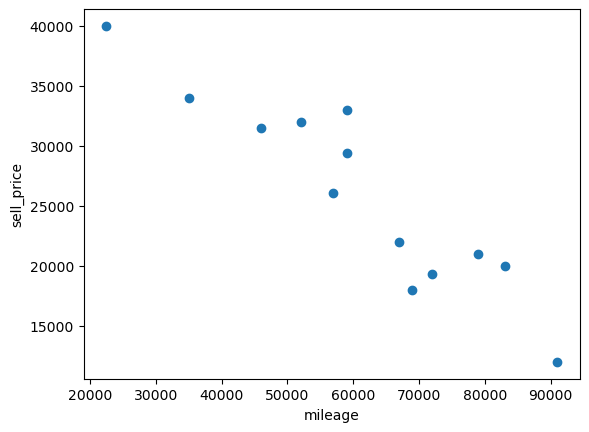

In [4]:
plt.xlabel('mileage')
plt.ylabel('sell_price')
plt.scatter(mileage, sell_price)

## Data Preprocessing

Car Model is in text form, so we need to convert into numerical by doing one-hot-encoding via get_dummies

Getting the dummies for Car Model

In [5]:
car_model_dummies = pd.get_dummies(df['Car Model'])
car_model_dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


### Concat the dummies with columns of car prices data

In [6]:
mergedData = pd.concat([df, car_model_dummies], axis = 'columns')
mergedData

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


### Removing Unncessary Columns - Car Model, and one of the value attribute of Car Model -  Mercedez Benz C class (let)


In [7]:
finalData = mergedData.drop(['Car Model', 'Mercedez Benz C class'], axis = 'columns')
finalData

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


### Input Data will not contain Sell Price, so for simplicity for extracting Input, drop Sell Price from finalData

In [8]:
y = finalData['Sell Price($)'].values
inputData = finalData.drop(['Sell Price($)'], axis = 'columns')
inputData

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [9]:
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [10]:
x = inputData.values
x

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
reg.fit(x, y)

LinearRegression()

In [13]:
reg.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [14]:
reg.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [15]:
reg.score(x, y)

0.9417050937281083